# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
! pip install citipy

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from pprint import pprint

# Impor the OpenWeatherMap API key
from apis_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manono
Processing Record 2 of Set 1 | rio grande
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | merauke
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | miguel calmon
Processing Record 8 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | antofagasta
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | slavsk
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | parkes
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | sorvag
City not found. Skipping...
Processing Record 19 of Set 1 | cody
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of S

Processing Record 36 of Set 4 | damietta
Processing Record 37 of Set 4 | arica
Processing Record 38 of Set 4 | tiksi
Processing Record 39 of Set 4 | nabire
Processing Record 40 of Set 4 | meadow lake
Processing Record 41 of Set 4 | turtkul
City not found. Skipping...
Processing Record 42 of Set 4 | sur
Processing Record 43 of Set 4 | qingyuan
Processing Record 44 of Set 4 | roma
Processing Record 45 of Set 4 | deputatskiy
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | magadan
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | calabar
Processing Record 0 of Set 5 | mitu
Processing Record 1 of Set 5 | najran
Processing Record 2 of Set 5 | balangir
Processing Record 3 of Set 5 | natal
Processing Record 4 of Set 5 | necochea
Processing Record 5 of Set 5 | mariental
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | morondava
Processing Record 8 of Set 5 | galveston
Processing Record 9 of Set 5 | haines junction
Processing Re

Processing Record 25 of Set 8 | toungoo
City not found. Skipping...
Processing Record 26 of Set 8 | sao joao do piaui
Processing Record 27 of Set 8 | mezhdurechensk
Processing Record 28 of Set 8 | floro
Processing Record 29 of Set 8 | saint-georges
Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | dalby
Processing Record 32 of Set 8 | vodnyy
Processing Record 33 of Set 8 | verkhoyansk
Processing Record 34 of Set 8 | abalak
Processing Record 35 of Set 8 | venadillo
Processing Record 36 of Set 8 | rincon
Processing Record 37 of Set 8 | kulhudhuffushi
Processing Record 38 of Set 8 | cazaje
City not found. Skipping...
Processing Record 39 of Set 8 | ondjiva
Processing Record 40 of Set 8 | gorontalo
Processing Record 41 of Set 8 | nyurba
Processing Record 42 of Set 8 | uk
City not found. Skipping...
Processing Record 43 of Set 8 | cachoeira do sul
Processing Record 44 of Set 8 | arroyo
Processing Record 45 of Set 8 | diglur
Processing Record 46 of Set 8 | mamallapura

Processing Record 10 of Set 12 | shelburne
Processing Record 11 of Set 12 | sarakhs
Processing Record 12 of Set 12 | honiara
Processing Record 13 of Set 12 | terrace bay
Processing Record 14 of Set 12 | jibuti
Processing Record 15 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 16 of Set 12 | boralday
Processing Record 17 of Set 12 | yialos
City not found. Skipping...
Processing Record 18 of Set 12 | venafro
Processing Record 19 of Set 12 | appleton
Processing Record 20 of Set 12 | mahibadhoo
Processing Record 21 of Set 12 | huambo
Processing Record 22 of Set 12 | ampanihy
Processing Record 23 of Set 12 | kampene
Processing Record 24 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 25 of Set 12 | gigmoto
Processing Record 26 of Set 12 | maxixe
Processing Record 27 of Set 12 | glenwood springs
Processing Record 28 of Set 12 | assiniboia
Processing Record 29 of Set 12 | tazovskiy
Processing Record 30 of Set 12 | mayo
Processing Record 31 of Se

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manono,-7.3000,27.4167,21.16,93,33,1.96,CD,1681757630
1,rio grande,-32.0350,-52.0986,21.06,69,68,6.83,BR,1681757631
2,carnarvon,-24.8667,113.6333,21.98,40,49,5.94,AU,1681757631
3,pacific grove,36.6177,-121.9166,15.21,68,0,5.66,US,1681757519
4,merauke,-8.4667,140.3333,26.85,82,100,1.94,ID,1681757632


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [58]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,manono,-7.3000,27.4167,21.16,93,33,1.96,CD,1681757630
1,rio grande,-32.0350,-52.0986,21.06,69,68,6.83,BR,1681757631
2,carnarvon,-24.8667,113.6333,21.98,40,49,5.94,AU,1681757631
3,pacific grove,36.6177,-121.9166,15.21,68,0,5.66,US,1681757519
4,merauke,-8.4667,140.3333,26.85,82,100,1.94,ID,1681757632


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

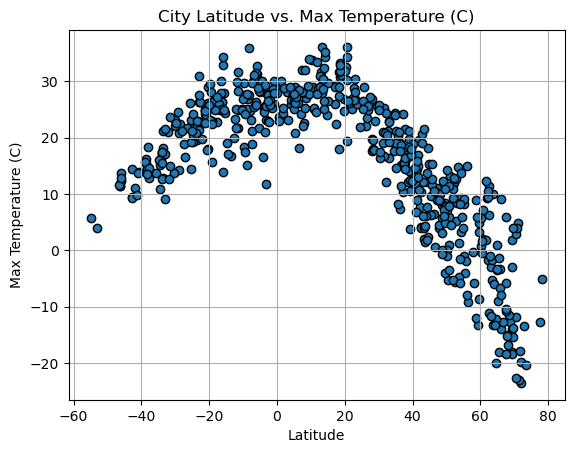

In [62]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(lat, temp, edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

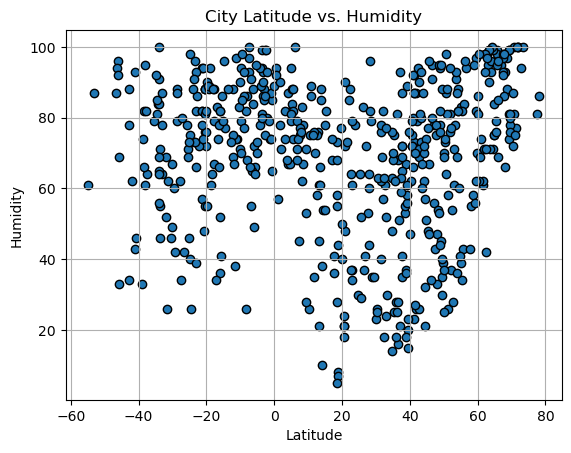

In [64]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
humid = city_data_df['Humidity']
plt.scatter(lat, humid, edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

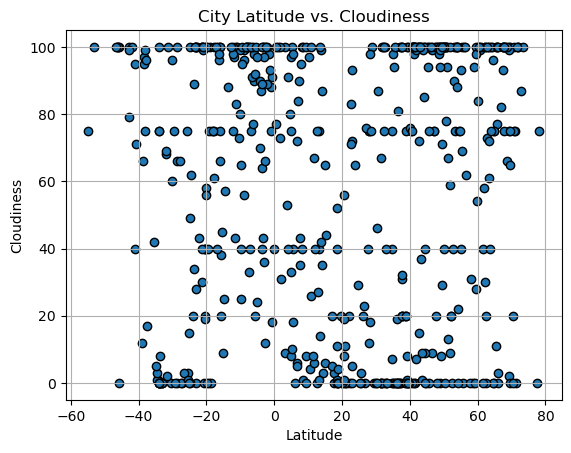

In [65]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
cloud = city_data_df['Cloudiness']
plt.scatter(lat, cloud, edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

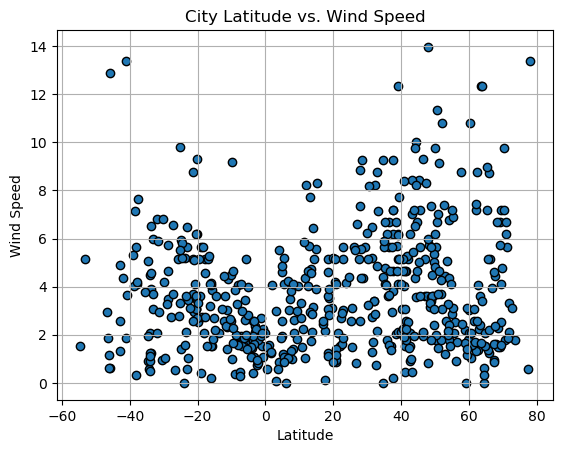

In [66]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
wspeed = city_data_df['Wind Speed']
plt.scatter(lat, wspeed, edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values, x_formula, y_formula, y_label):
    (slope, intercept, rvalue, pvalue, stderrr) =linregress(x_values,y_values)
    regress_values = slope * x_values + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, color= 'red')
    plt.annotate(f'y = {round(slope,2)}x + {round(intercept,2)}', (x_formula, y_formula), color= 'red')
    plt.xlabel(x_values.name)
    plt.ylabel(y_label)
    plt.title(x_values.name + ' vs. ' + y_values.name)
    plt.grid(True)
    
    print(f'The r-value is: {rvalue}')
    plt.show()
    

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,pacific grove,36.6177,-121.9166,15.21,68,0,5.66,US,1681757519
7,saskylakh,71.9167,114.0833,-23.51,100,100,2.12,RU,1681757633
10,nanortalik,60.1432,-45.2371,0.84,86,100,3.05,GL,1681757634
11,slavsk,55.0425,21.6770,8.22,83,93,2.85,RU,1681757634
12,ilulissat,69.2167,-51.1000,-2.99,74,75,6.69,GL,1681757634


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,manono,-7.3000,27.4167,21.16,93,33,1.96,CD,1681757630
1,rio grande,-32.0350,-52.0986,21.06,69,68,6.83,BR,1681757631
2,carnarvon,-24.8667,113.6333,21.98,40,49,5.94,AU,1681757631
4,merauke,-8.4667,140.3333,26.85,82,100,1.94,ID,1681757632
5,busselton,-33.6500,115.3333,12.88,71,0,3.90,AU,1681757632


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8834795010451443


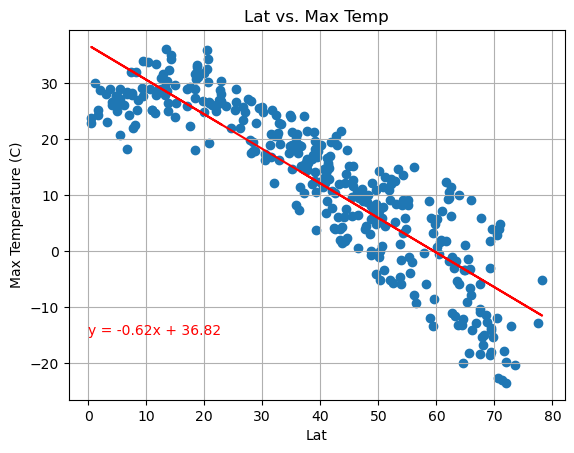

In [105]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_formula = 0
y_formula = -15
y_label = 'Max Temperature (C)'

linear_reg(x_values, y_values, x_formula, y_formula, y_label)

The r-value is: 0.7340769343298832


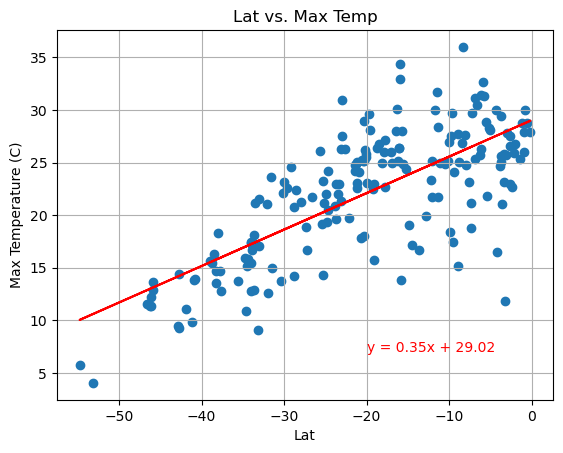

In [107]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_formula = -20
y_formula = 7
y_label = 'Max Temperature (C)'

linear_reg(x_values, y_values, x_formula, y_formula, y_label)

**Discussion about the linear relationship:** For both Northern and Southern Hemispheres, the correlation is strong. Depending on the time on the time of the year, the greater the latitude the temperarue will increase or decrease depending on the hemipshere and the time of the year.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.27162360718525796


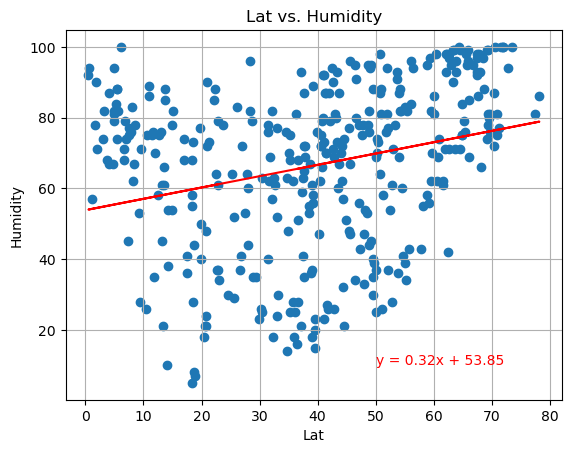

In [110]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_formula = 50
y_formula = 10
y_label = 'Humidity'

linear_reg(x_values, y_values, x_formula, y_formula, y_label)

The r-value is: 0.2373418764919553


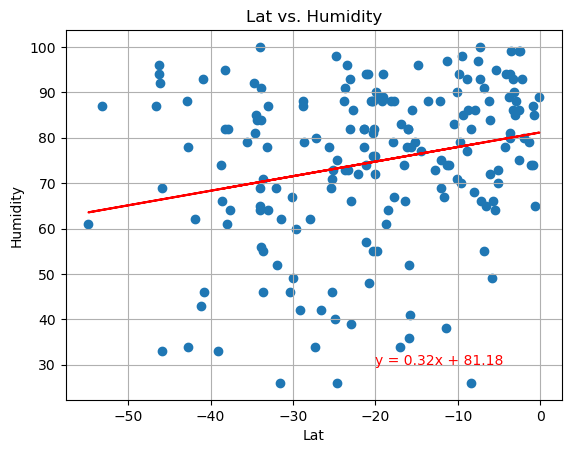

In [112]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_formula = -20
y_formula = 30
y_label = 'Humidity'

linear_reg(x_values, y_values, x_formula, y_formula, y_label)

**Discussion about the linear relationship:** Both correlation values for Northern and Souther Hemisphere are low. The increment in one doesn't affect greatly the variation for the y variable.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25224669392071264


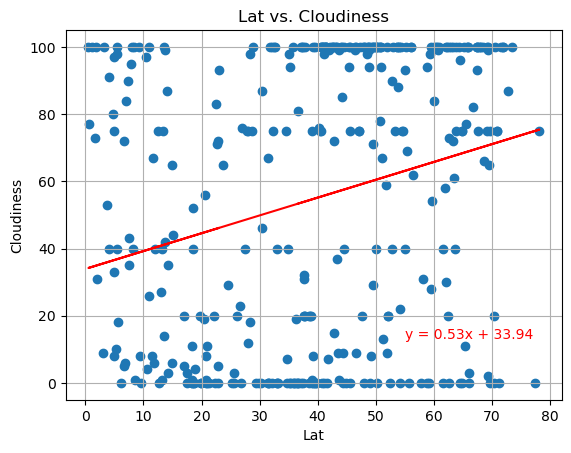

In [118]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_formula = 55
y_formula = 13
y_label = 'Cloudiness'

linear_reg(x_values, y_values, x_formula, y_formula, y_label)

The r-value is: 0.216876363410631


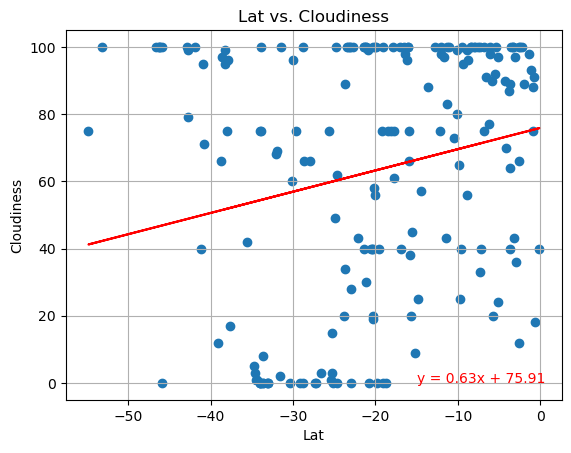

In [119]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_formula = -15
y_formula = 0
y_label = 'Cloudiness'

linear_reg(x_values, y_values, x_formula, y_formula, y_label)

**Discussion about the linear relationship:** Both correlation values for Northern and Souther Hemisphere are low. The increment in one doesn't affect greatly the variation for the y variable.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13479338112116687


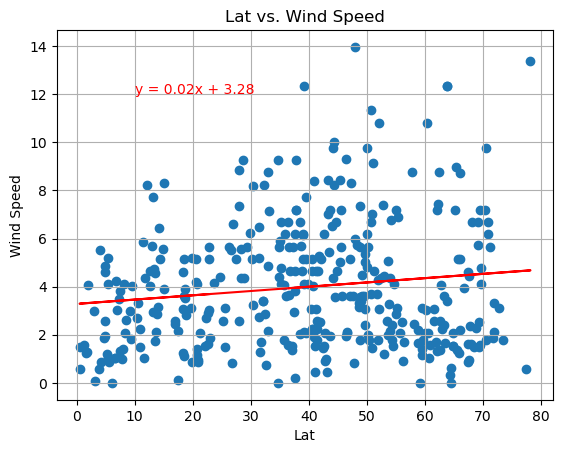

In [120]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_formula = 10
y_formula = 12
y_label = 'Wind Speed'

linear_reg(x_values, y_values, x_formula, y_formula, y_label)

The r-value is: 0.062239040700515696


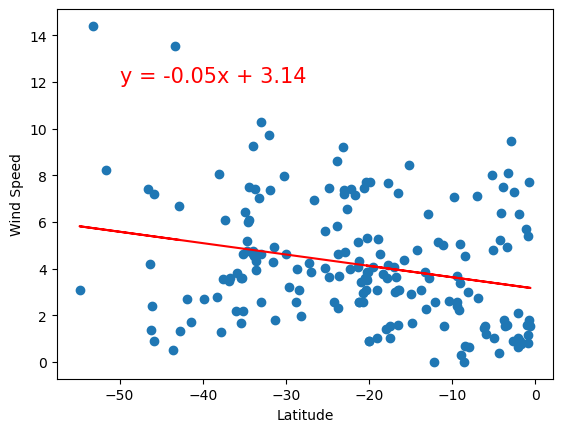

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_formula = -20
y_formula = 30
y_label = 'Wind Speed'

linear_reg(x_values, y_values, x_formula, y_formula, y_label)

**Discussion about the linear relationship:** Both correlation values for Northern and Souther Hemisphere are low. The increment in one doesn't affect greatly the variation for the y variable.  